# Multilayer Perceptron and Backpropagation

In [29]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Question 1 

Consider the neural network considered in the first question of the theoretical component of the practical class, with number of units: 4,4,3,3.

![](https://drive.google.com/uc?id=1SHUgdosKp6AX8rRAACCZ5nb4kUXreI3g)

Assume all units, except the ones in the output layer, use the hyperbolic tangent activation function. 

Consider the following training example:

$\mathbf{x} =\begin{bmatrix} 1, 0, 1, 0 \end{bmatrix}^\intercal $,   $\mathbf{y} =\begin{bmatrix} 0\\ 1\\ 0 \end{bmatrix}$

❓ Using the squared error loss do a stochastic gradient descent update, initializing all connection weights and biases to 0.1 and a  learning rate η = 0.1:

1. Perform the forward pass
2. Compute the loss
3. Compute gradients with backpropagation
4. Update weights

In [30]:
inputs = np.array([[1, 0, 1, 0]])
labels = np.array([[0, 1, 0]])

# First is input size, last is output size.
units = [4, 4, 3, 3]

# Initialize weights with correct shapes 
w1 = np.ones((4,4)) * 0.1
w2 = np.ones((3,4)) * 0.1
w3 = np.ones((3,3)) * 0.1
b1 = np.ones((4)) * 0.1
b2 = np.ones((3)) * 0.1
b3 = np.ones((3)) * 0.1


In [31]:
# Forward Pass
x = inputs[0]
y = labels[0]

z1 = w1.dot(x) + b1
h1 = np.tanh(z1)

z2 = w2.dot(h1) + b2
h2 = np.tanh(z2)

z3 = w3.dot(h2) + b3
z3

array([0.16396106, 0.16396106, 0.16396106])

In [32]:
# Loss
loss = 0.5 * (z3 - y).dot(z3 - y)
loss

0.37636378397755565

In [33]:
# Backpropagation
z3_grad = z3 - y

# [:, None] adds a dimension
w3_grad = z3_grad[:, None].dot(h2[:, None].T)
b3_grad = z3_grad
h2_grad = w3.T.dot(z3_grad)
z2_grad = h2_grad * (1-np.tanh(z2)**2)

w2_grad = z2_grad[:, None].dot(h1[:, None].T)
b2_grad = z2_grad
h1_grad = w2.T.dot(z2_grad)
z1_grad = h1_grad * (1-np.tanh(z1)**2)

w1_grad = z1_grad[:, None].dot(x[:, None].T)
b1_grad = z1_grad

In [34]:
# Update Gradients
eta = 0.1


w1 = w1 - eta * w1_grad
w2 = w2 - eta * w2_grad
w3 = w3 - eta * w3_grad

b1 = b1 - eta * b1_grad
b2 = b2 - eta * b2_grad
b3 = b3 - eta * b3_grad

Gradient descent:
Foward propagation for all data points

Backpropagation with the original parameters for each data points

Sum the gradients of all data points and update weights

Learning rate absorbs the 1/N of the gradient descent, so we could put it or not, depends

Stochastic Gradient Descent:
Foward propagation of a data point

Backpropagation with it

Update the parameters with its gradients

# GRADIENT DESCENT

In [35]:
inputs = np.array([[0, 0, 10, 0]])
labels = np.array([[0, 0, 1]])

# First is input size, last is output size.
units = [4, 4, 3, 3]

# Initialize weights with correct shapes 
w1 = np.ones((4,4)) * 0.1
w2 = np.ones((3,4)) * 0.1
w3 = np.ones((3,3)) * 0.1
b1 = np.ones((4)) * 0.1
b2 = np.ones((3)) * 0.1
b3 = np.ones((3)) * 0.1

In [36]:
# Forward Pass
x = inputs[0]
y = labels[0]

z1 = w1.dot(x) + b1
h1 = np.tanh(z1)

z2 = w2.dot(h1) + b2
h2 = np.tanh(z2)

z3 = w3.dot(h2) + b3

In [37]:
# Loss
loss1 = 0.5 * (z3 - y).dot(z3 - y)
loss + loss1

0.729260865456343

In [38]:
# Backpropagation
z3_grad1 = z3 - y

# [:, None] adds a dimension
w3_grad1 = z3_grad1[:, None].dot(h2[:, None].T)
b3_grad1 = z3_grad1
h2_grad1 = w3.T.dot(z3_grad1)
z2_grad1 = h2_grad1 * (1-np.tanh(z2)**2)

w2_grad1 = z2_grad1[:, None].dot(h1[:, None].T)
b2_grad1 = z2_grad1
h1_grad1 = w2.T.dot(z2_grad1)
z1_grad1 = h1_grad1 * (1-np.tanh(z1)**2)

w1_grad1 = z1_grad1[:, None].dot(x[:, None].T)
b1_grad1 = z1_grad1

In [39]:
# Update Gradients
eta = 0.1

w1 = w1 - eta * (w1_grad + w1_grad1)
w2 = w2 - eta * (w2_grad + w2_grad1)
w3 = w3 - eta * (w3_grad + w3_grad1)

b1 = b1 - eta * (b1_grad + b1_grad1)
b2 = b2 - eta * (b2_grad + b2_grad1)
b3 = b3 - eta * (b3_grad + b3_grad1)

❓ Let's say we were using the same training example but with the following changes:
- The output units have a softmax activation function
- The error function is cross-entropy

Keeping the same initializations and learning rate, adjust your computations to the new changes.

**Solution:** We need only to change:  
- the output, *i.e.*, $\hat{y} = softmax(z_3)$ instead of $\hat{y} = z_3$
- the loss computation to $L = -y.log(\hat{y})$
- the gradient of the loss with respect to $z_3$: $\frac{dL}{dz_3}$

All other steps remain unchanged.

In [40]:
# Your code here
inputs = np.array([[1, 0, 1, 0]])
labels = np.array([[0, 1, 0]])

# First is input size, last is output size.
units = [4, 4, 3, 3]

# Initialize weights with correct shapes 
w1 = np.ones((4,4)) * 0.1
w2 = np.ones((3,4)) * 0.1
w3 = np.ones((3,3)) * 0.1
b1 = np.ones((4)) * 0.1
b2 = np.ones((3)) * 0.1
b3 = np.ones((3)) * 0.1

In [41]:
# Forward Pass
x = inputs[0]
y = labels[0]

z1 = w1.dot(x) + b1
h1 = np.tanh(z1)

z2 = w2.dot(h1) + b2
h2 = np.tanh(z2)

z3 = w3.dot(h2) + b3

In [42]:
# Loss
exp_scores = np.exp(z3)
z_value = np.sum(exp_scores)
y_prob = exp_scores / z_value

correct_class = np.argmax(y)

loss = np.log(z_value) - z3[correct_class]
loss

1.0986122886681098

In [43]:
# Backpropagation
z3_grad = y_prob - y

# [:, None] adds a dimension
w3_grad = z3_grad[:, None].dot(h2[:, None].T)
b3_grad = z3_grad
h2_grad = w3.T.dot(z3_grad)
z2_grad = h2_grad * (1-np.tanh(z2)**2)

w2_grad = z2_grad[:, None].dot(h1[:, None].T)
b2_grad = z2_grad
h1_grad = w2.T.dot(z2_grad)
z1_grad = h1_grad * (1-np.tanh(z1)**2)

w1_grad = z1_grad[:, None].dot(x[:, None].T)
b1_grad = z1_grad

In [44]:
# Update Gradients
eta = 0.1

w1 = w1 - eta * w1_grad
w2 = w2 - eta * w2_grad
w3 = w3 - eta * w3_grad

b1 = b1 - eta * b1_grad
b2 = b2 - eta * b2_grad
b3 = b3 - eta * b3_grad

# GRADIENT DESCENT

In [45]:
inputs = np.array([[0, 0, 10, 0]])
labels = np.array([[0, 0, 1]])

# First is input size, last is output size.
units = [4, 4, 3, 3]

# Initialize weights with correct shapes 
w1 = np.ones((4,4)) * 0.1
w2 = np.ones((3,4)) * 0.1
w3 = np.ones((3,3)) * 0.1
b1 = np.ones((4)) * 0.1
b2 = np.ones((3)) * 0.1
b3 = np.ones((3)) * 0.1

In [46]:
# Forward Pass
x = inputs[0]
y = labels[0]

z1 = w1.dot(x) + b1
h1 = np.tanh(z1)

z2 = w2.dot(h1) + b2
h2 = np.tanh(z2)

z3 = w3.dot(h2) + b3

In [47]:
# Loss
exp_scores = np.exp(z3)
z_value = np.sum(exp_scores)
y_prob = exp_scores / z_value

correct_class = np.argmax(y)

loss1 = np.log(z_value) - z3[correct_class]
loss + loss1

2.1972245773362196

In [48]:
# Backpropagation
z3_grad1 = y_prob - y

# [:, None] adds a dimension
w3_grad1 = z3_grad1[:, None].dot(h2[:, None].T)
b3_grad1 = z3_grad1
h2_grad1 = w3.T.dot(z3_grad1)
z2_grad1 = h2_grad1 * (1-np.tanh(z2)**2)

w2_grad1 = z2_grad1[:, None].dot(h1[:, None].T)
b2_grad1 = z2_grad1
h1_grad1 = w2.T.dot(z2_grad1)
z1_grad1 = h1_grad1 * (1-np.tanh(z1)**2)

w1_grad1 = z1_grad1[:, None].dot(x[:, None].T)
b1_grad1 = z1_grad1

In [49]:
# Update Gradients
eta = 0.1

w1 = w1 - eta * w1_grad
w2 = w2 - eta * w2_grad
w3 = w3 - eta * w3_grad

b1 = b1 - eta * b1_grad
b2 = b2 - eta * b2_grad
b3 = b3 - eta * b3_grad

❓ Complete functions `forward`, `compute_loss`, `backpropagation` and `update_weights` generalized to perform the same computations as before, but for any MLP architecture.

In [50]:
'''
x: single observation of shape (n,)
weights: list of weight matrices [W1, W2, ...]
biases: list of biases matrices [b1, b2, ...]

y: final output
hiddens: list of computed hidden layers [h1, h2, ...]
'''

def forward(x, weights, biases):
    num_layers = len(weights)
    g = np.tanh
    hiddens = []
    
    z1 = weights[0].dot(x) + biases[0]
    h1 = g(z1)
    hiddens.append((z1, h1))
    
    # compute hidden layers
    for i in range(1, num_layers-1):
        z = weights[i].dot(hiddens[i-1][1]) + biases[i]
        h = g(z)
        hiddens.append((z, h))
    
    #compute output
    if num_layers == 1:
        output = z1
    else:
        output = weights[-1].dot(hiddens[-1][1]) + biases[-1]
    
    return output, hiddens

def compute_loss(output, y):
    # Loss
    exp_scores = np.exp(output)
    z_value = np.sum(exp_scores)

    correct_class = np.argmax(y)

    loss = np.log(z_value) - output[correct_class]
    
    return loss   

def backward(x, y, output, hiddens, weights):
    num_layers = len(weights)
    g = np.tanh
    z = output
    
    probs = np.exp(z) / np.sum(np.exp(z))
    grad_z = probs - y
    
    grad_weights = []
    grad_biases = []
    
    # Backpropagate gradient computations 
    for i in range(num_layers-1, 0, -1):
        # Gradient of hidden parameters.
        grad_weights.append(grad_z[:, None].dot(hiddens[i-1][1][:, None].T))
        grad_biases.append(grad_z)
        grad_h = weights[i].T.dot(grad_z)
        grad_z = grad_h * (1 - g(hiddens[i-1][0])**2)
    
    grad_weights.append(grad_z[:, None].dot(x[:, None].T))
    grad_biases.append(grad_z)
    # Making gradient vectors have the correct order
    grad_weights.reverse()
    grad_biases.reverse()
    return grad_weights, grad_biases

def update_weights(weights, grad_weights, biases, grad_biases, eta = 0.01):
    for i in range(len(weights)):
        weights[i] -= eta * grad_weights[i]
        biases[i] -= eta * grad_biases[i]
    return weights, biases

## Question 2

Now we will use the MLP on real data to classify handwritten digits.

Data is loaded, split into train and test sets and target is one-hot encoded below:

In [51]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

data = load_digits()

inputs = data.data  
labels = data.target  
n, p = np.shape(inputs)
n_classes = len(np.unique(labels))


X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42)

# Encode labels as one-hot vectors.
one_hot = np.zeros((np.size(y_train, 0), n_classes))
for i in range(np.size(y_train, 0)):
    one_hot[i, y_train[i]] = 1
y_train_ohe = one_hot
one_hot = np.zeros((np.size(y_test, 0), n_classes))
for i in range(np.size(y_test, 0)):
    one_hot[i, y_test[i]] = 1
y_test_ohe = one_hot

❓ Complete function `MLP_train_epoch` using your previously defined functions to compute one epoch of training using SGD:

In [52]:
'''
Outputs:
    - weights: list of updated weights
    - biases: list of updated 
    - loss: scalar of total loss (sum for all observations)

'''

def MLP_train_epoch(inputs, labels, weights, biases, eta = 0.01):
    total_loss = 0
    
    # For each observation and target
    for x, y in zip(inputs, labels):
        # Compute forward pass
        output, hiddens = forward(x, weights, biases)
        # Compute Loss and update total loss
        total_loss += compute_loss(output, y)
        # Compute backpropagation
        grad_weights, grad_biases = backward(x, y, output, hiddens, weights)
        # Update weights
        weights, biases = update_weights(weights, grad_weights, biases, grad_biases, eta)
        
    return weights, biases, total_loss

Let's use a MLP with a single hidden layer of 50 units and a learning rate of $0.001$. 

❓ Run 100 epochs of your MLP. Save the loss at each epoch in a list and plot the loss evolution after training.

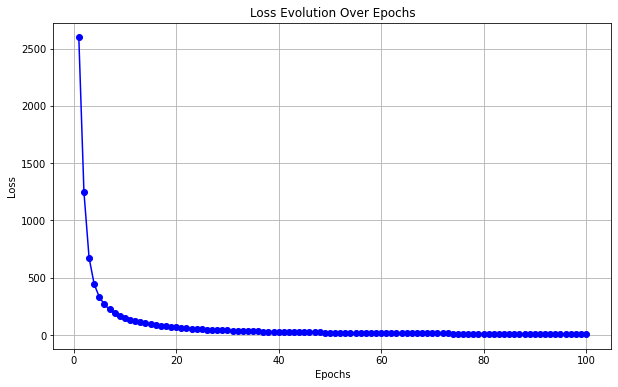

In [53]:
# NOTE TO SELF: NEVER, EVER, try to initialize weights and biases all with the same value. Symmetry breaking is important.

# Initialize weights
w1 = np.random.randn(50, p) * 0.01
w2 = np.random.randn(n_classes, 50) * 0.01
w = [w1, w2]

b1 = np.random.randn(50) * 0.01
b2 = np.random.randn(n_classes) * 0.01
b = [b1, b2]

# Empty loss list
loss_list = []

# Learning rate.
eta = 0.001
epochs = 100

# Run epochs and append loss to list
for i in range(epochs):
    w, b, loss = MLP_train_epoch(X_train, y_train_ohe, w, b, eta)
    loss_list.append(loss)

# Plot loss evolution

# Plot the loss evolution
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), loss_list, marker='o', linestyle='-', color='b')
plt.title('Loss Evolution Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


❓ Complete function `MLP_predict` to get array of predictions from your trained MLP:

In [54]:
def MLP_predict(inputs, weights, biases):
    predicted_labels = []
    for x in inputs:
        output, _ = forward(x, weights, biases)
        predicted_labels.append(np.argmax(output))
    predicted_labels = np.array(predicted_labels)
    return predicted_labels

❓ Compute the accuracy on the train and test sets.

In [55]:
predicted_labels_train = MLP_predict(X_train, w, b)
predicted_labels_test = MLP_predict(X_test, w, b)

print(f'Train accuracy: {(predicted_labels_train==y_train).mean()}')
print(f'Test accuracy: {(predicted_labels_test==y_test).mean()}')

Train accuracy: 1.0
Test accuracy: 0.9722222222222222


We can compare our results with Sklearn's implementation of the MLP. Compare their accuracies:

In [56]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50),
                    activation='tanh',
                    solver='sgd',
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    nesterovs_momentum=False,
                    random_state=1,
                    max_iter=1000)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9993041057759221
0.9722222222222222
